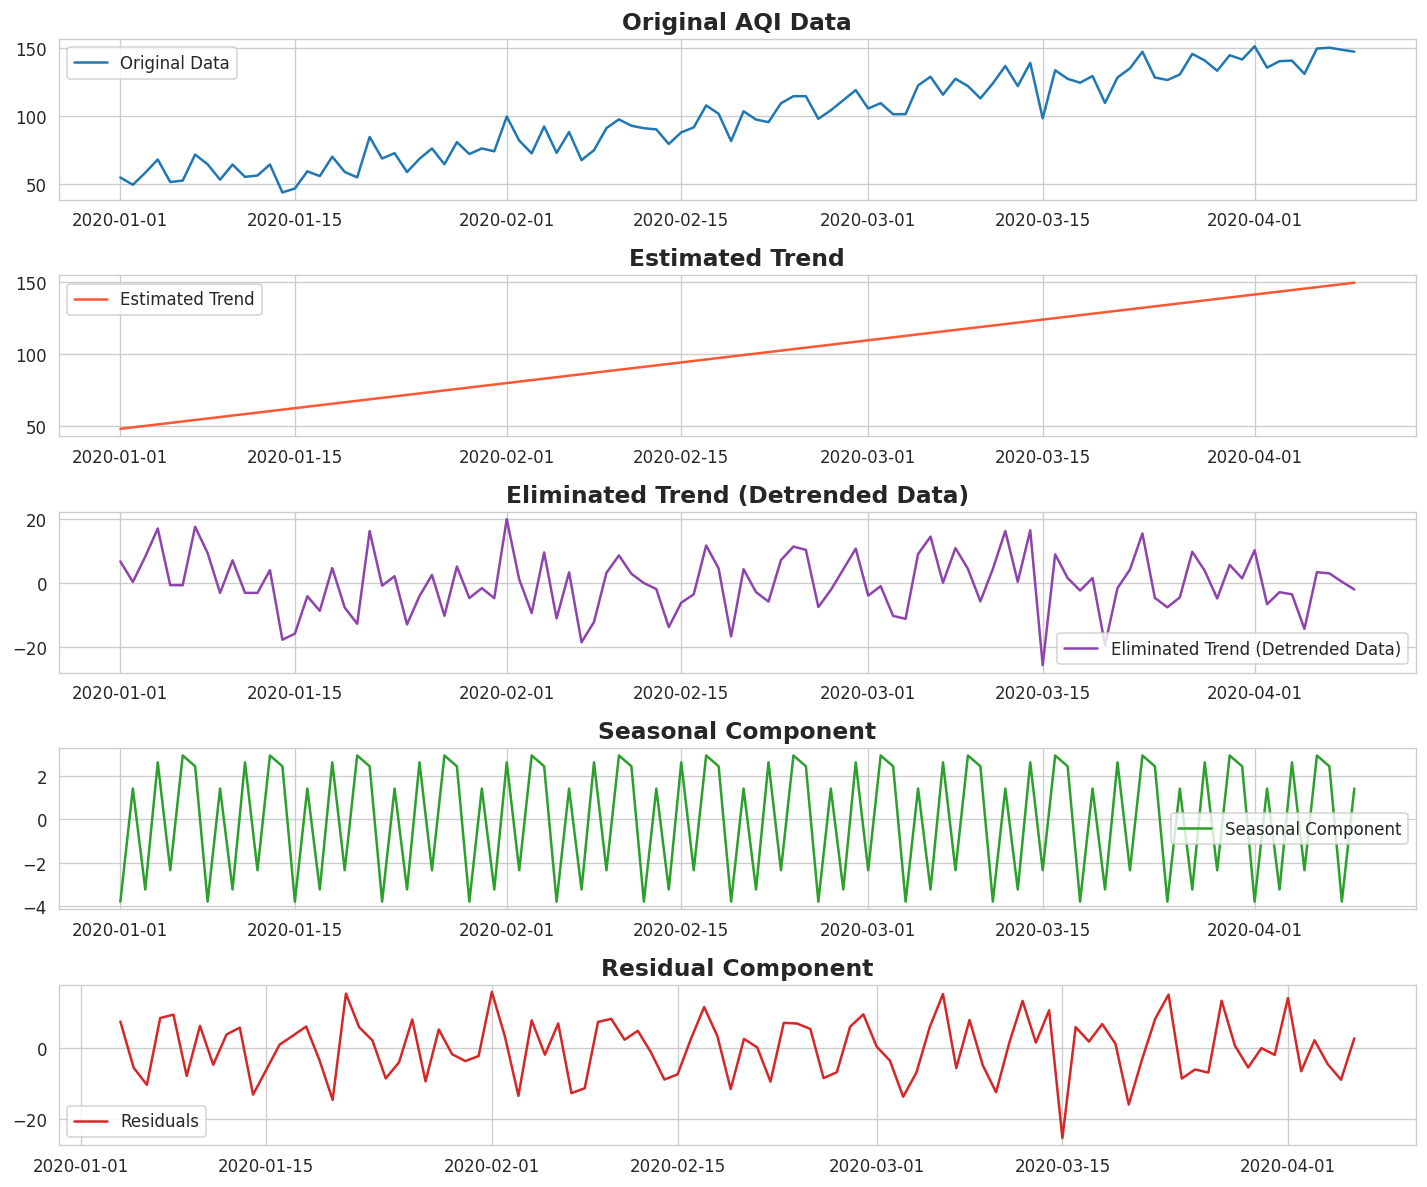

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic air quality dataset
dates = pd.date_range(start="2020-01-01", periods=100, freq='D')
np.random.seed(42)
aqi_values = np.linspace(50, 150, 100) + np.random.normal(0, 10, 100)

df = pd.DataFrame({'Date': dates, 'AQI Value': aqi_values})
df.set_index('Date', inplace=True)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(range(len(df)), df['AQI Value'])
df['Trend'] = slope * np.arange(len(df)) + intercept

# Decompose the time series
decomposition = seasonal_decompose(df['AQI Value'], model='additive', period=7)
df['Seasonal'] = decomposition.seasonal
df['Residual'] = decomposition.resid

# Eliminating trend from the data
df['Detrended'] = df['AQI Value'] - df['Trend']

# Plot the estimated and eliminated trends
plt.figure(figsize=(12, 10), dpi=120)

plt.subplot(5, 1, 1)
plt.plot(df.index, df['AQI Value'], label="Original Data", color='#1F77B4')
plt.title("Original AQI Data", fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(5, 1, 2)
plt.plot(df.index, df['Trend'], label="Estimated Trend", color='#FF5733')
plt.title("Estimated Trend", fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(5, 1, 3)
plt.plot(df.index, df['Detrended'], label="Eliminated Trend (Detrended Data)", color='#8E44AD')
plt.title("Eliminated Trend (Detrended Data)", fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(df.index, df['Seasonal'], label="Seasonal Component", color='#2CA02C')
plt.title("Seasonal Component", fontsize=14, fontweight='bold')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(df.index, df['Residual'], label="Residuals", color='#D62728')
plt.title("Residual Component", fontsize=14, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()